<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/Tema2_T%C3%A8cniques_d'agrupament.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 2: Tècniques d’agrupament no-supervisat (clustering algorithms)

2.1 L'algorisme K-keans

2.2 Agrupament agglomeratiu

2.3 Models de mescla Gaussiana (Gaussian Mixture Models)

# 2.1 L'algorisme K-means:

[1] Especifiqueu el nombre de clústers $k$ que es trobaran a les dades.

[2] Estableix els valors inicials per als centroides del clúster $\mu^0_1,\dots,\mu^0_k$ (a l'atzar o coneixement previ).

[3] Assigna cada observació al cúmul més proper (distància euclidiana).

[4] Recalculeu el baricentre de cada clúster a partir de les observacions assignades $\mu^1_1,\dots,\mu^1_k$.

[5] Repetiu els passos 3-4 fins que no hi hagi cap canvi en els centroides. Proporcioneu la agrupació final $\mu^n_1,\dots,\mu^n_k$, on $n$ és el nombre d'iteracions.


### Exemple 1: dades sintètiques

Conjunt de dades sintètic molt simple

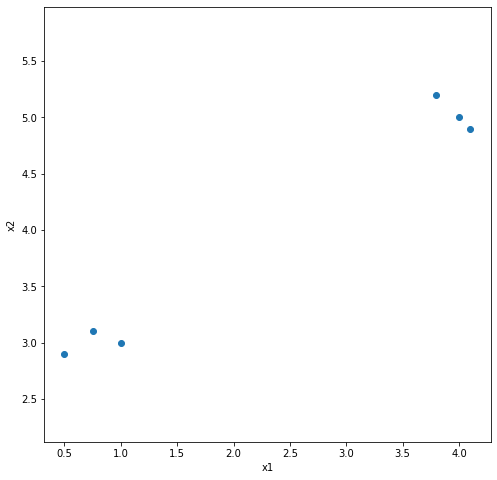

In [ ]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1,3],[3.8,5.2],[0.5,2.9],[0.75,3.1],[4,5],[4.1,4.9]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(D)
print(group)

[1 0 1 1 0 0]


In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(D,columns=['x','y'])
df['kmeans']=group

In [ ]:
df.head()

,x,y,kmeans
0,1.00,3.0,1
1,3.80,5.2,0
2,0.50,2.9,1
3,0.75,3.1,1
4,4.00,5.0,0


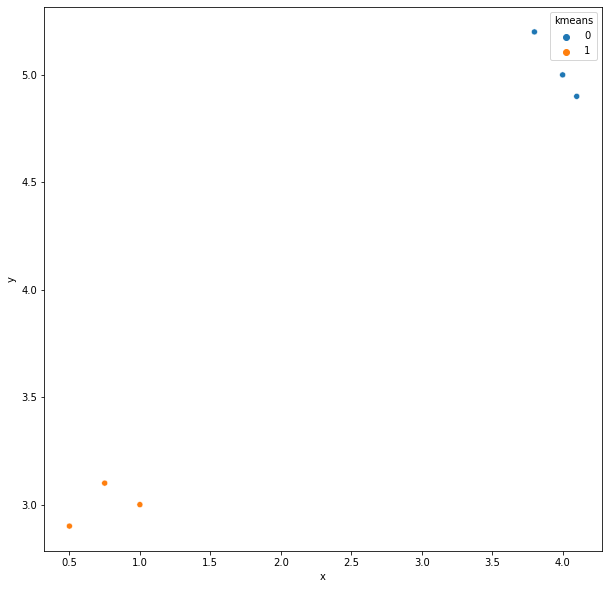

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x',y='y',hue='kmeans',data=df)
plt.show()

NOTA: Si volem conèixer més detalls sobre els clústers trobats, s'utilitza la funció fit i no fit_predict (és l'última vegada només les etiquetes d'assignació de les observacions a clústers, és dir la predicció de l'algoratge k-means). El detall de variables es pot consultar a https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
kmeans_result = KMeans(n_clusters=2).fit(D)
print('Etiquetas de asignacion a clusters {}'.format(kmeans_result.labels_))
print('Posición de los centroides de los clusters {}'.format(kmeans_result.cluster_centers_))
print('Número de iteraciones necesarias {}'.format(kmeans_result.n_iter_))

NameError: ignored

### Exemple 2: Clustering the iris dataset

In [ ]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

X = iris[['sepal_length','sepal_width','petal_length','petal_width']] # features
y = iris['species'] # class labels

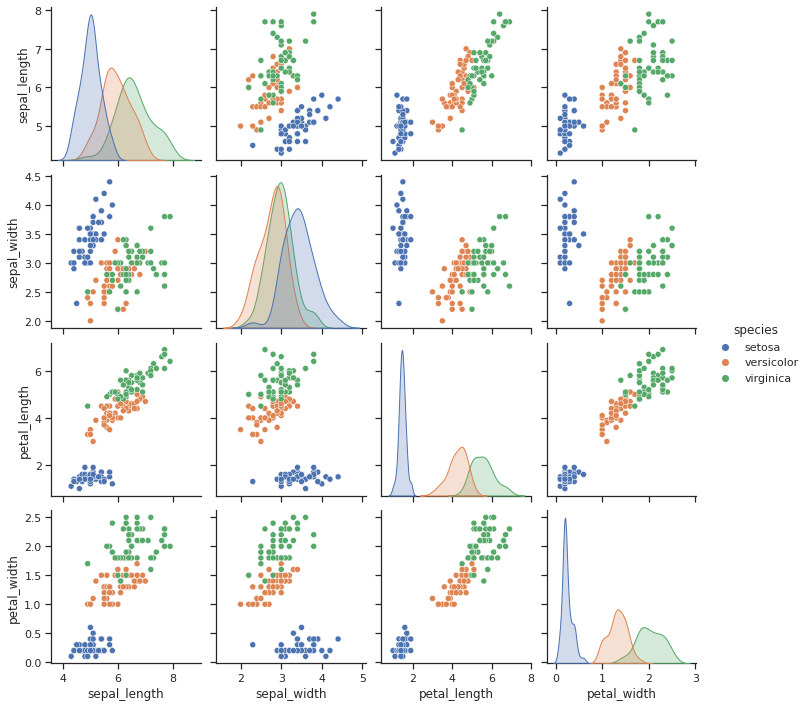

In [ ]:
g = sns.pairplot(iris, hue="species")

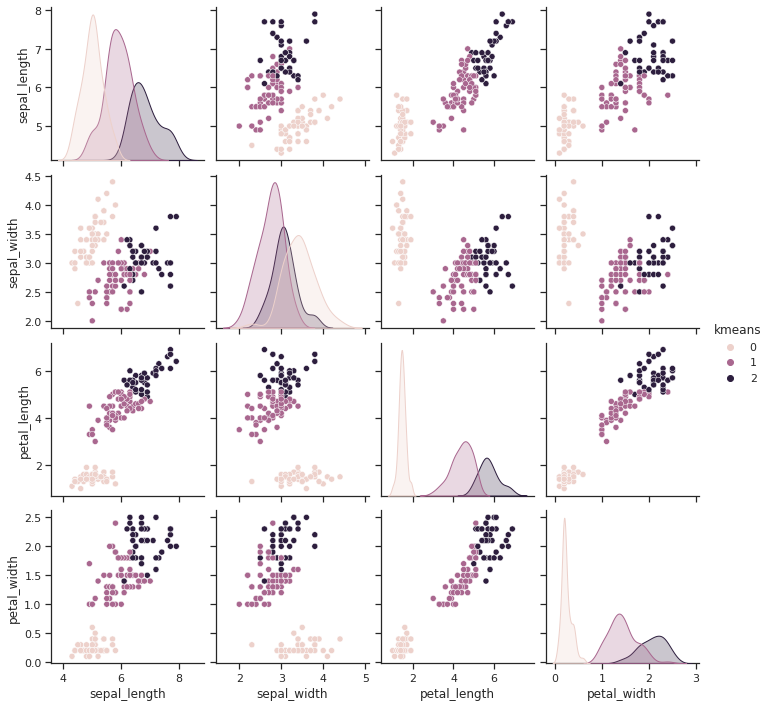

In [ ]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=3).fit_predict(X)

iris_grouped = iris.copy()
iris_grouped['kmeans'] = group
g = sns.pairplot(iris_grouped, hue="kmeans")

### Exemple 3: Núvols de punts aleatoris

Generem dades agrupada en núvols de clústers amb diferents posicions relatives i formes

Text(0.5, 1.0, 'k-means simple blobs')

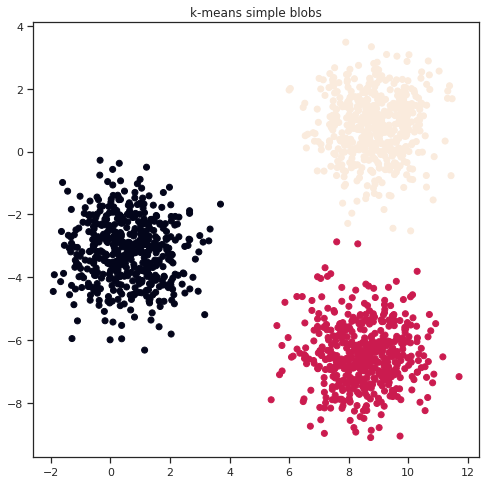

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = 3)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")

Número incorrecte de clústers en l'algorament k-means

Text(0.5, 1.0, 'k-means simple blobs')

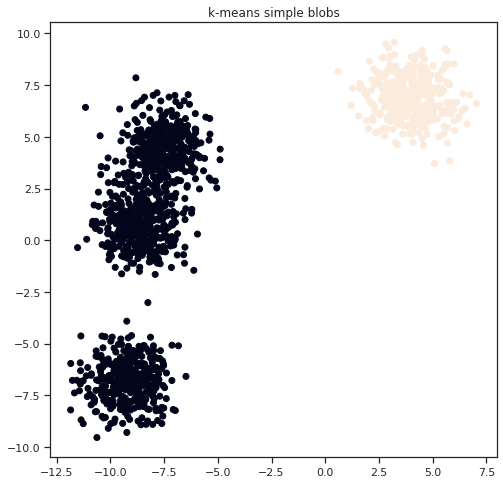

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = 4)

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")

Núvols amb diferent nombre d'observacions

Text(0.5, 1.0, 'k-means simple blobs')

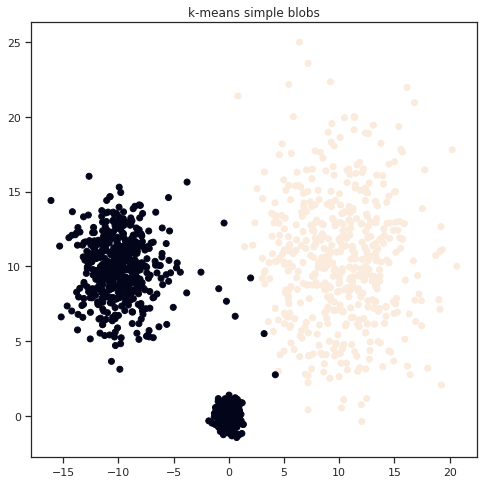

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers = [(0,0),(-10,10),(10,10)],cluster_std=(0.5,2,4))

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means simple blobs")

# 2.2 Agrupament agglomeratiu:

Seqüència de particions de les dades en un conjunt de clústers. Poden ser aglomeratius o divisius. L'algorisme és el següent:

[1] Especifiqueu el nombre de clústers 𝑘 que es trobaran a les dades.

[2] Inicia el nombre de clústers al nombre d'observacions 𝑁 .

[3] Agrupeu els dos clusters més propers en funció d'una distància entre clusters.

[4] Recalculeu el centroide de cada clúster a partir de les observacions assignades 𝜇_1,...,𝜇_{N-1} .

[5] Repetiu els passos 3-4 fins que el nombre de clústers sigui 𝑘 .




### Exemple 1: dades sintètiques:

Unes poques observacions en 2D

In [2]:
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

NameError: ignored

Apliquem el clustering jerárquico aglomerativo a les dades buscant dos clústers:

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(X) 
clustering.labels_

array([1, 1, 1, 0, 0, 0])

Representem el drendrograma

{'color_list': ['g', 'g', 'r', 'r', 'b'],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 2.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 2.0, 2.0, 2.0],
  [2.0, 3.0, 3.0, 2.0]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'ivl': ['2', '0', '1', '5', '3', '4'],
 'leaves': [2, 0, 1, 5, 3, 4]}

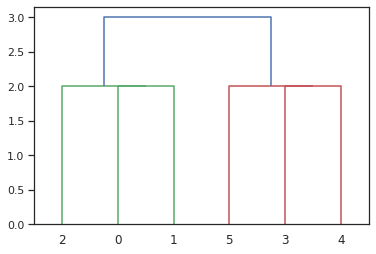

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z) 

### Exemple 2: Núvols de punts aleatoris

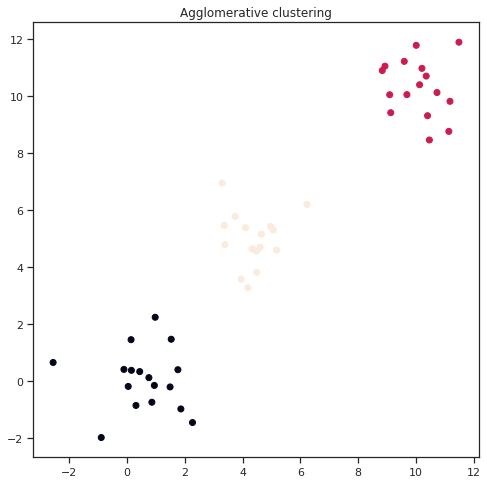

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Genera datos aleatoriamente en dos grupos localizados en posiciones diferentes:
n_samples = 50
centers = [(0, 0), (5, 5),(10,10)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)

clustering = AgglomerativeClustering(n_clusters=3).fit(X) 

plt.figure(figsize=(8, 8))
labels = clustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative clustering")
plt.show()